# Use Cases

In this notebook we will walk you through LAMA's unique ability to discover Leitmotifs in multidimensional time series.

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

from tests.multivariate_penguins_test import *

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

# LAMA API

LAMA has a simple Object-Oriented-API. 

The main parameters of LAMA are:
- n_dims : Number of sub-dimensions to use
- $k_{max}$ : The largest expected number of repeats. LAMA will search from $2$ to $k_{max}$ for motif sets
- length range $[l_{min}, l_{max}]$

<pre>
ml = LAMA(
    ds_name,     # Name of the dataset
    series,      # Multidimensional time series
    n_dims,      # Number of sub-dimensions to use
    n_jobs,      # number of parallel jobs
)
</pre>

LAMA has a unique feature to automatically find suitable values for the motif length $l$ and set size $k$ so, that meaningful Leitmotifs of an input TS can be found without domain knowledge. The methods for determining values for $k$ and $l$ are based on an analysis of the extent function for different $k$.


## Learning the leitmotif length $l$

To learn the leitmotif length, we may simply call:

<pre>
ml.fit_motif_length(
    k_max,               # expected number of repeats
    motif_length_range,  # motif length range
    plot,                # Plot the results
    plot_elbows,         # Create an elbow plot 
    plot_motifsets,      # Plot the found motif sets
    plot_best_only       # Plot only the motif sets of the optimal length. Otherwise plot all local optima in lengths
)    
</pre>

To do variable length leitmotif discovery simply set `plot_best_only=False`

## Learning the number of repeats

To do an elbow plot, and learn the number of repeats of the leitmotif, we may simply call:

<pre>
ml.fit_k_elbow(
    k_max,
    motif_length,         # motif length to use
    plot_elbows,          # Plot the elbow plot
    plot_motifsets        # Plot the found motif sets
)
</pre>

# Magellanic Penguin

This use case originates from Zhu et al. [1], and contains telemetry gathered from a Magellanic penguin (Spheniscus magellanicus). It was collected using a compact multi-channel data-logging device attached to the bird, comprises a total of $1,048,575$ time stamps, recorded at 40 Hz, which is approximately 7.2 hours. The X-axis acceleration represents the direction of travel during swimming.

## References

[1] Yan Zhu, Makoto Imamura, Daniel Nikovski, and Eamonn Keogh. 2017. Matrix profile vii: Time series chains: A new primitive for time series data mining. In 2017 IEEE international conference on data mining (ICDM). IEEE, 695–704.

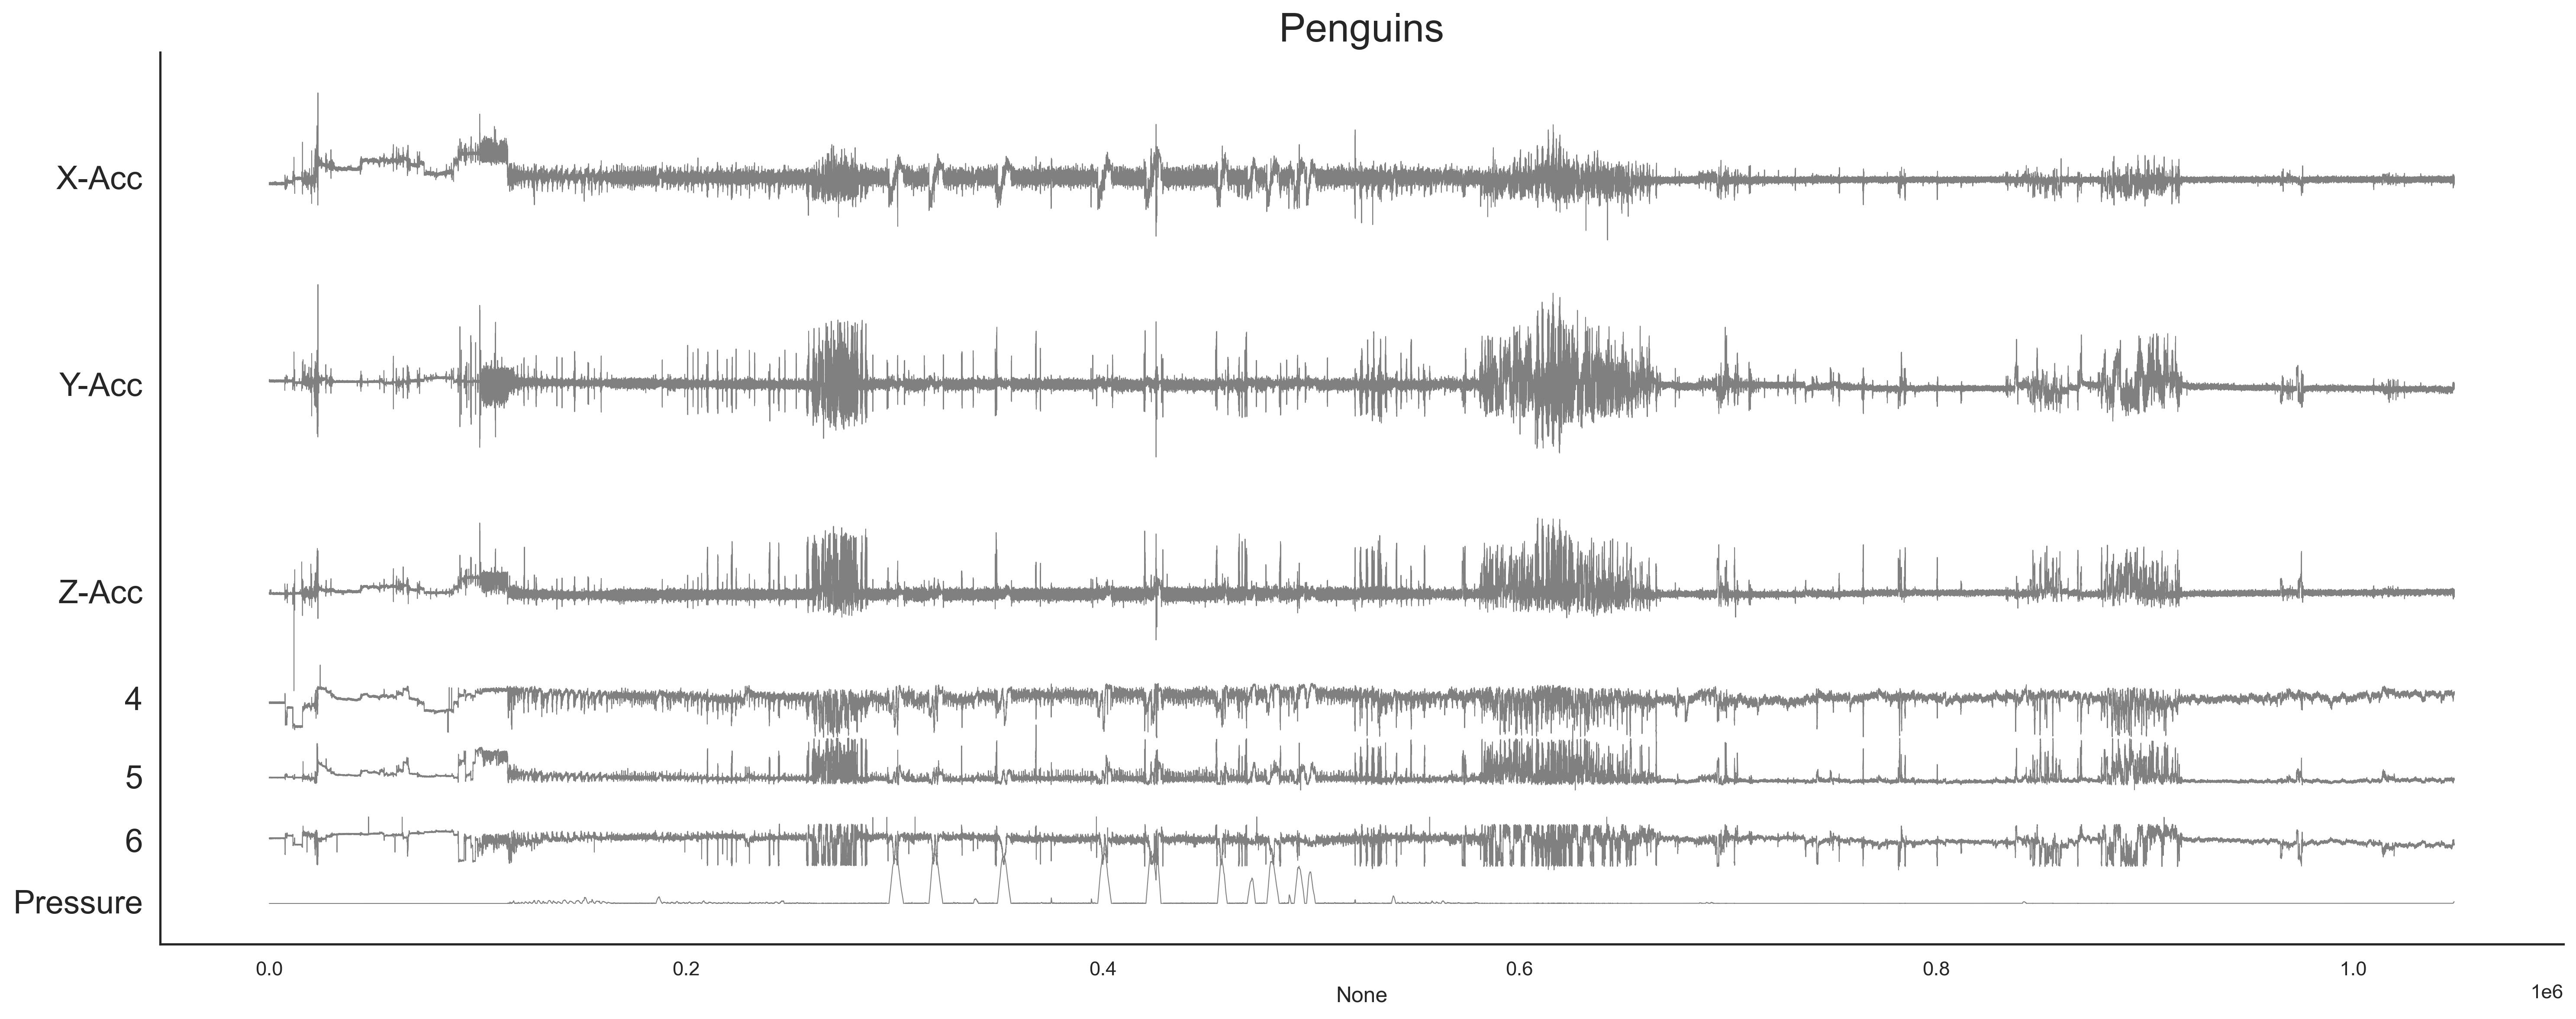

In [2]:
# Load datasaet
ds_name, TS = read_penguin_data()
series = TS.iloc[:, [0, 1, 2, 3, 4, 5, 7]].T

# Plot Dataset
_ = plot_dataset(ds_name, series)

# Finding Leitmotifs in Telemetry Data

Here, we focus on two subsets of the data, each about $50$ seconds, during which the Penguin (a) first dives to its hunting ground, indicated by an increase of pressure, (b) followed by hunting.    

For each, we see three plots: 

1. Length plot: The *optimal motif lengths* found
2. Elbow-plot: The *largest motif set* of the optimal motif length
3. Leitmotif: The position and sub-dimensions of the motif set in the time series

# Start of the dive

The penguin starts to dive into the hunting ground, indicated by increase of pressure. The Leitmotif is a regular stroke with $35$ repeats of length $23$.  Both leitmotifs locate in X-Acc and Z-Acc dimensions.

Using Default Backend


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Compute ks (40):   0%|          | 0/39 [00:00<?, ?it/s]

Using Default Backend


Compute ks (40):   0%|          | 0/39 [00:00<?, ?it/s]

Using Default Backend


Compute ks (40):   0%|          | 0/39 [00:00<?, ?it/s]

Using Default Backend


Compute ks (40):   0%|          | 0/39 [00:00<?, ?it/s]

Using Default Backend


Compute ks (40):   0%|          | 0/39 [00:00<?, ?it/s]

Using Default Backend


Compute ks (40):   0%|          | 0/39 [00:00<?, ?it/s]

Using Default Backend


Compute ks (40):   0%|          | 0/39 [00:00<?, ?it/s]

Using Default Backend


Compute ks (40):   0%|          | 0/39 [00:00<?, ?it/s]

Using Default Backend


Compute ks (40):   0%|          | 0/39 [00:00<?, ?it/s]

Using Default Backend


Compute ks (40):   0%|          | 0/39 [00:00<?, ?it/s]

	Time 23.5 s


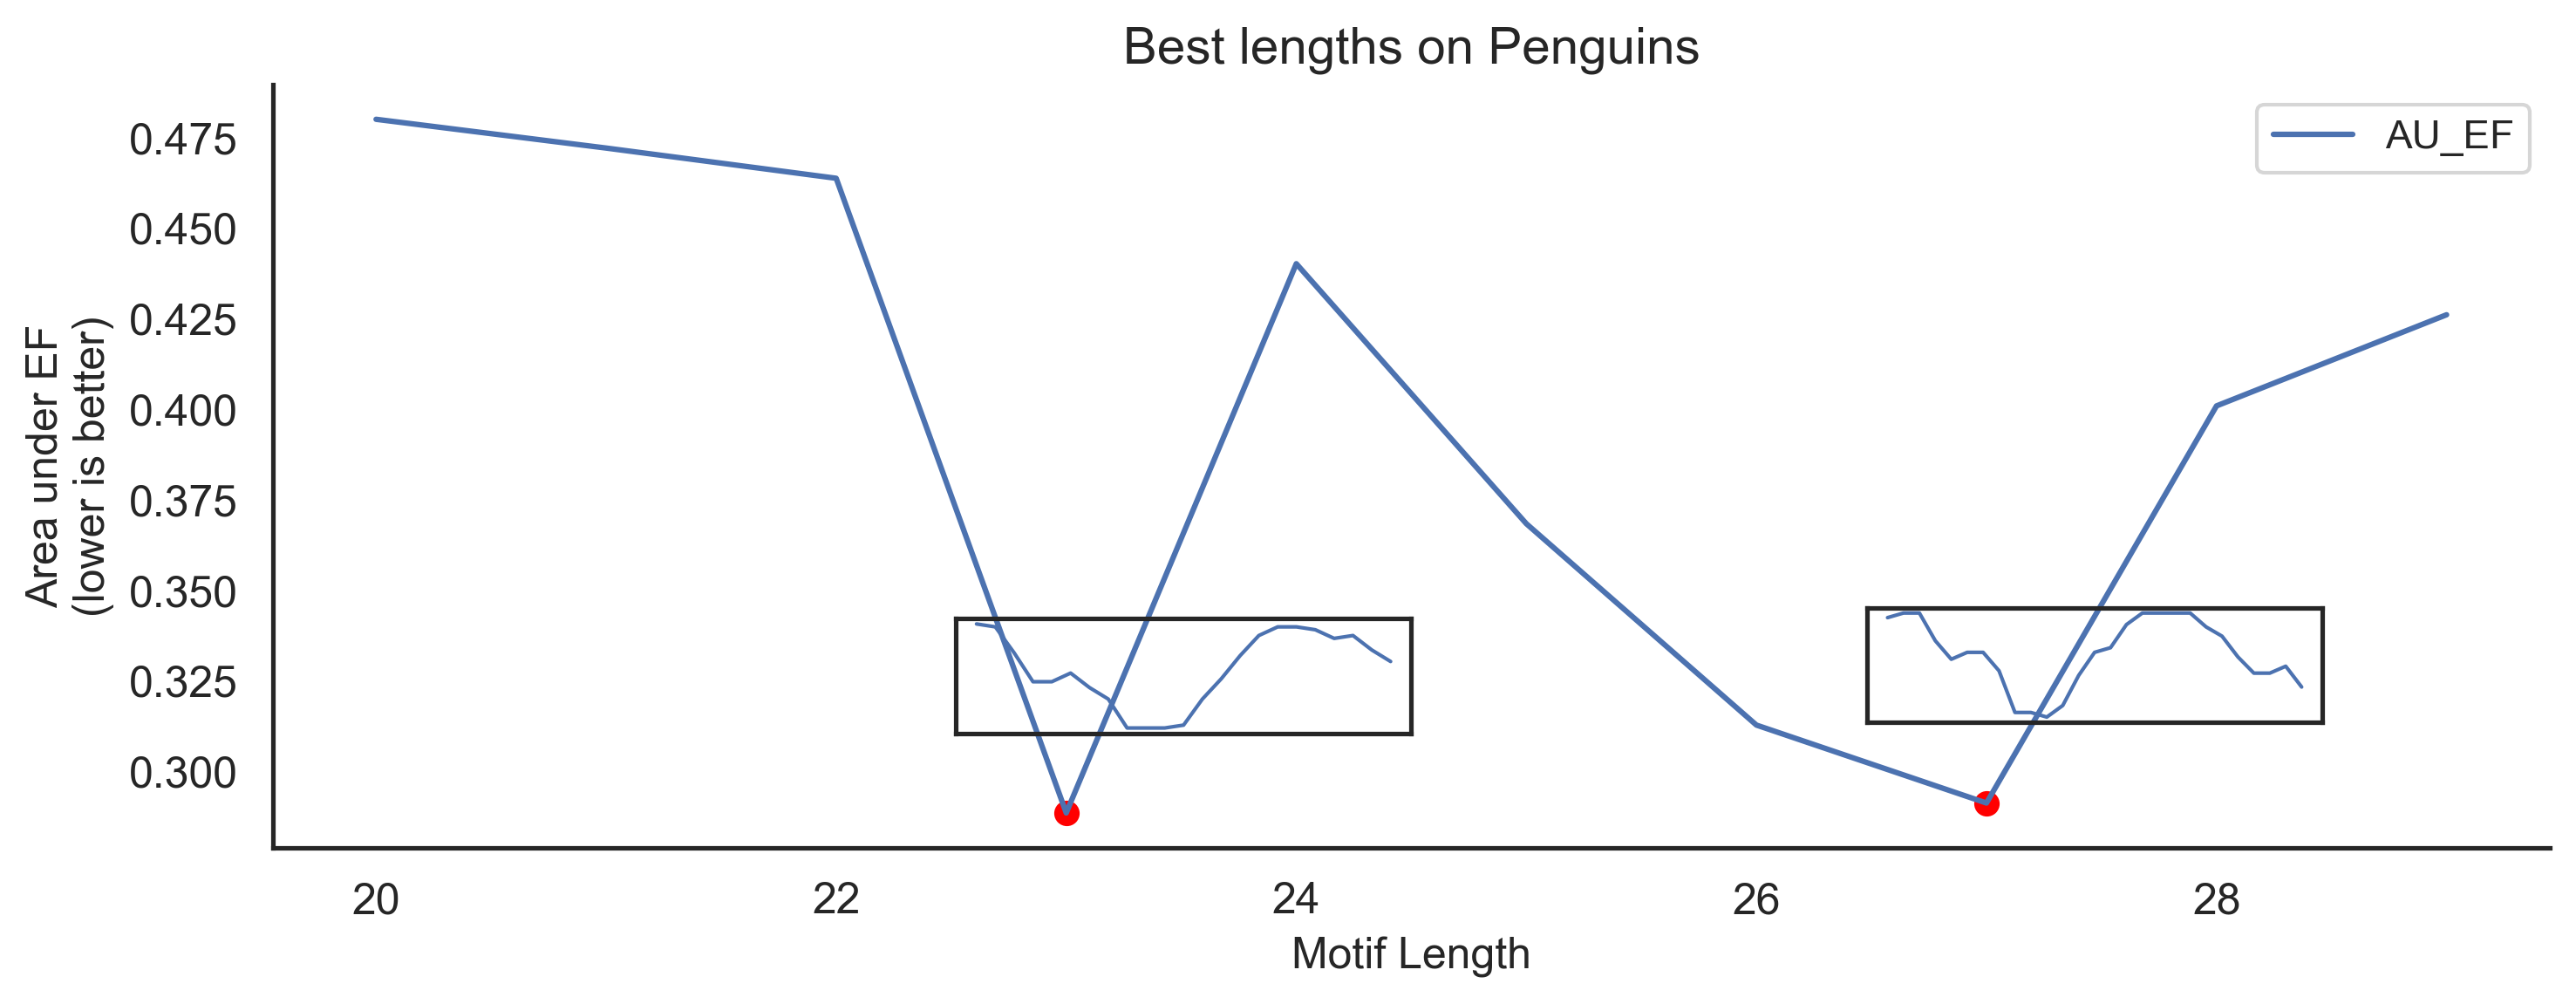

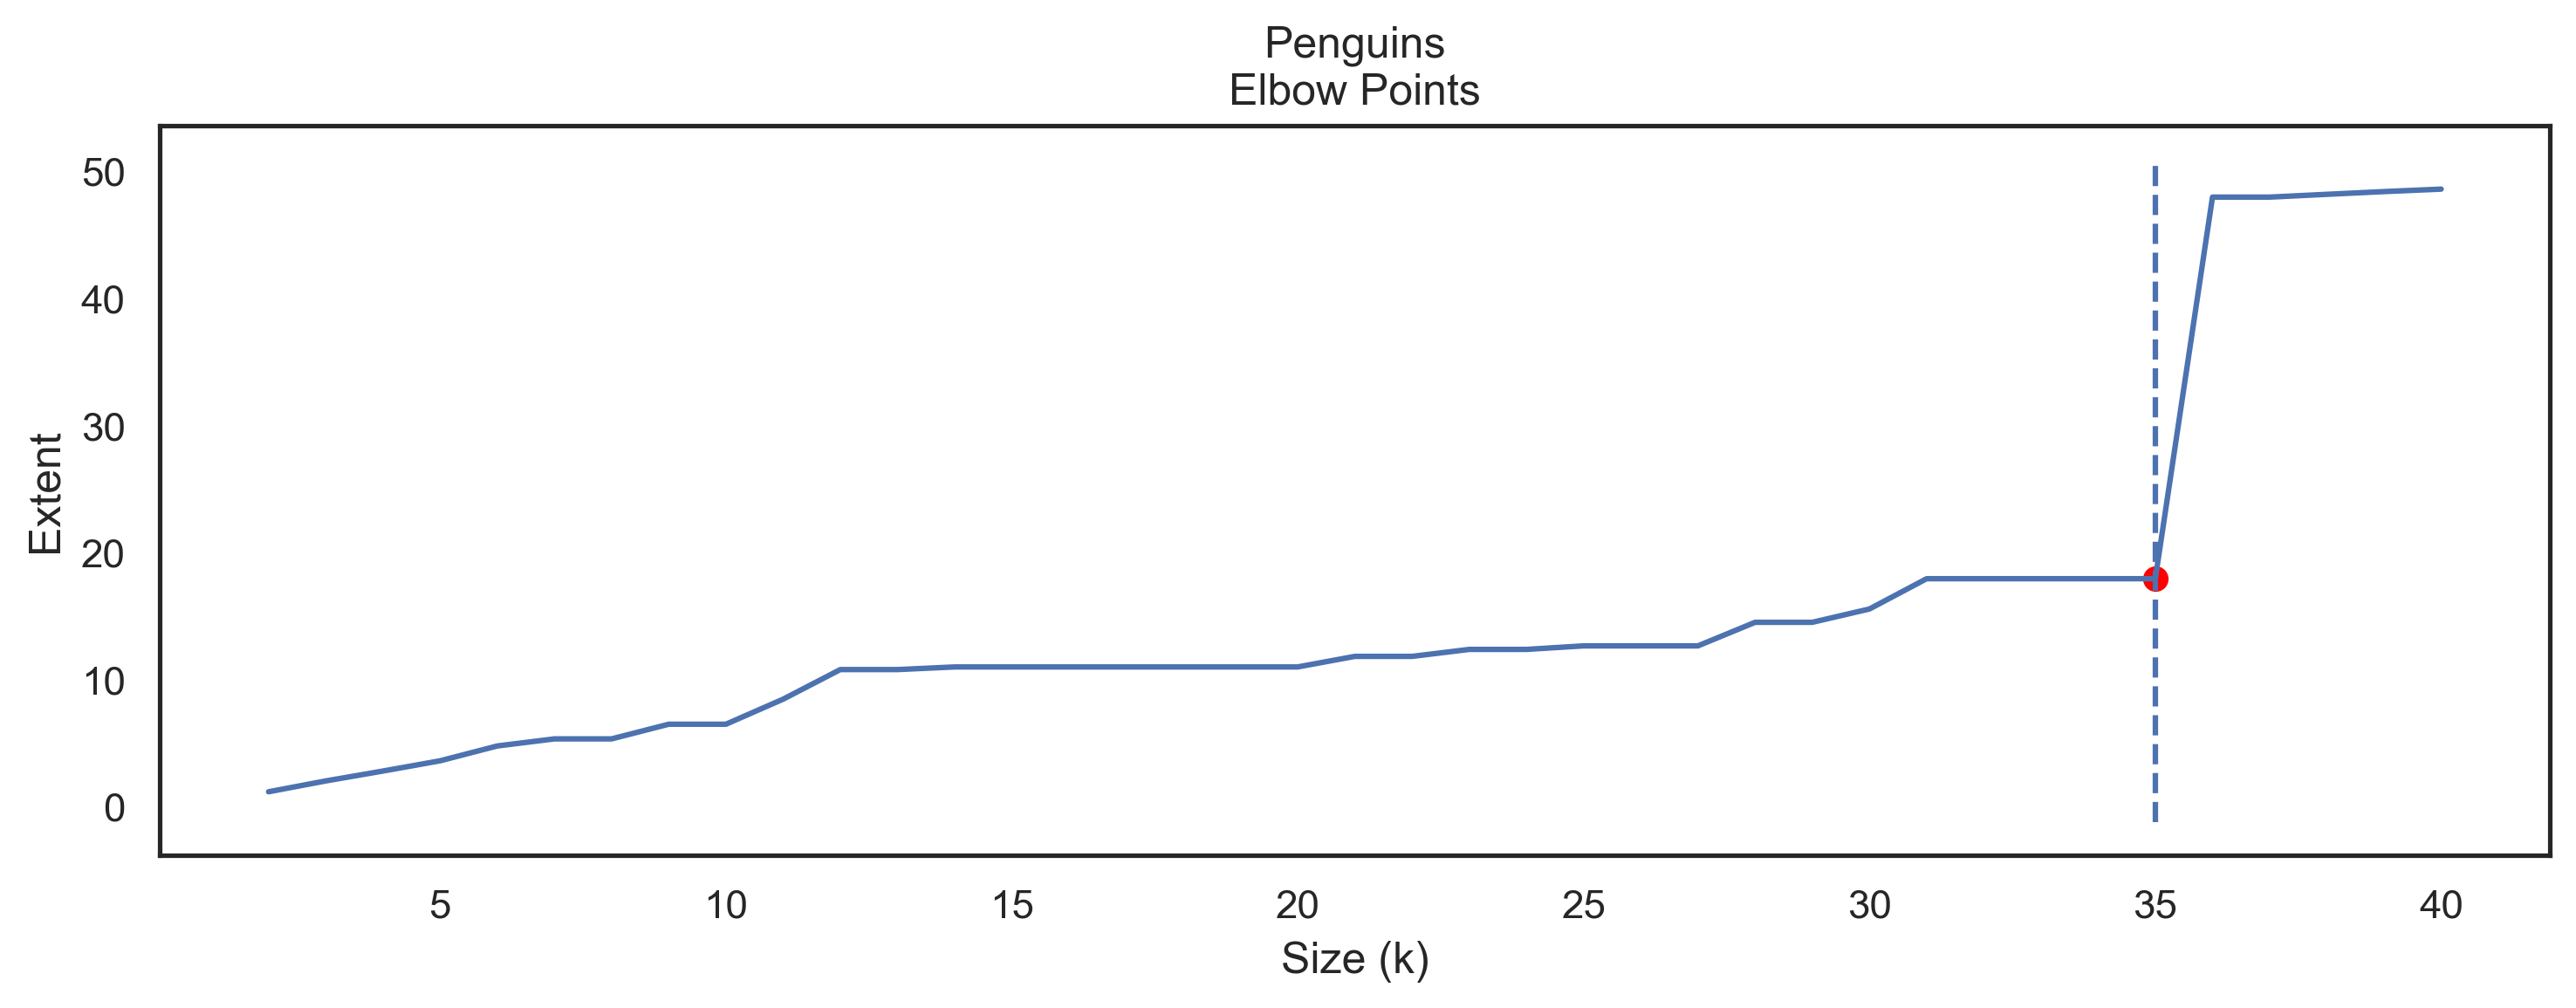

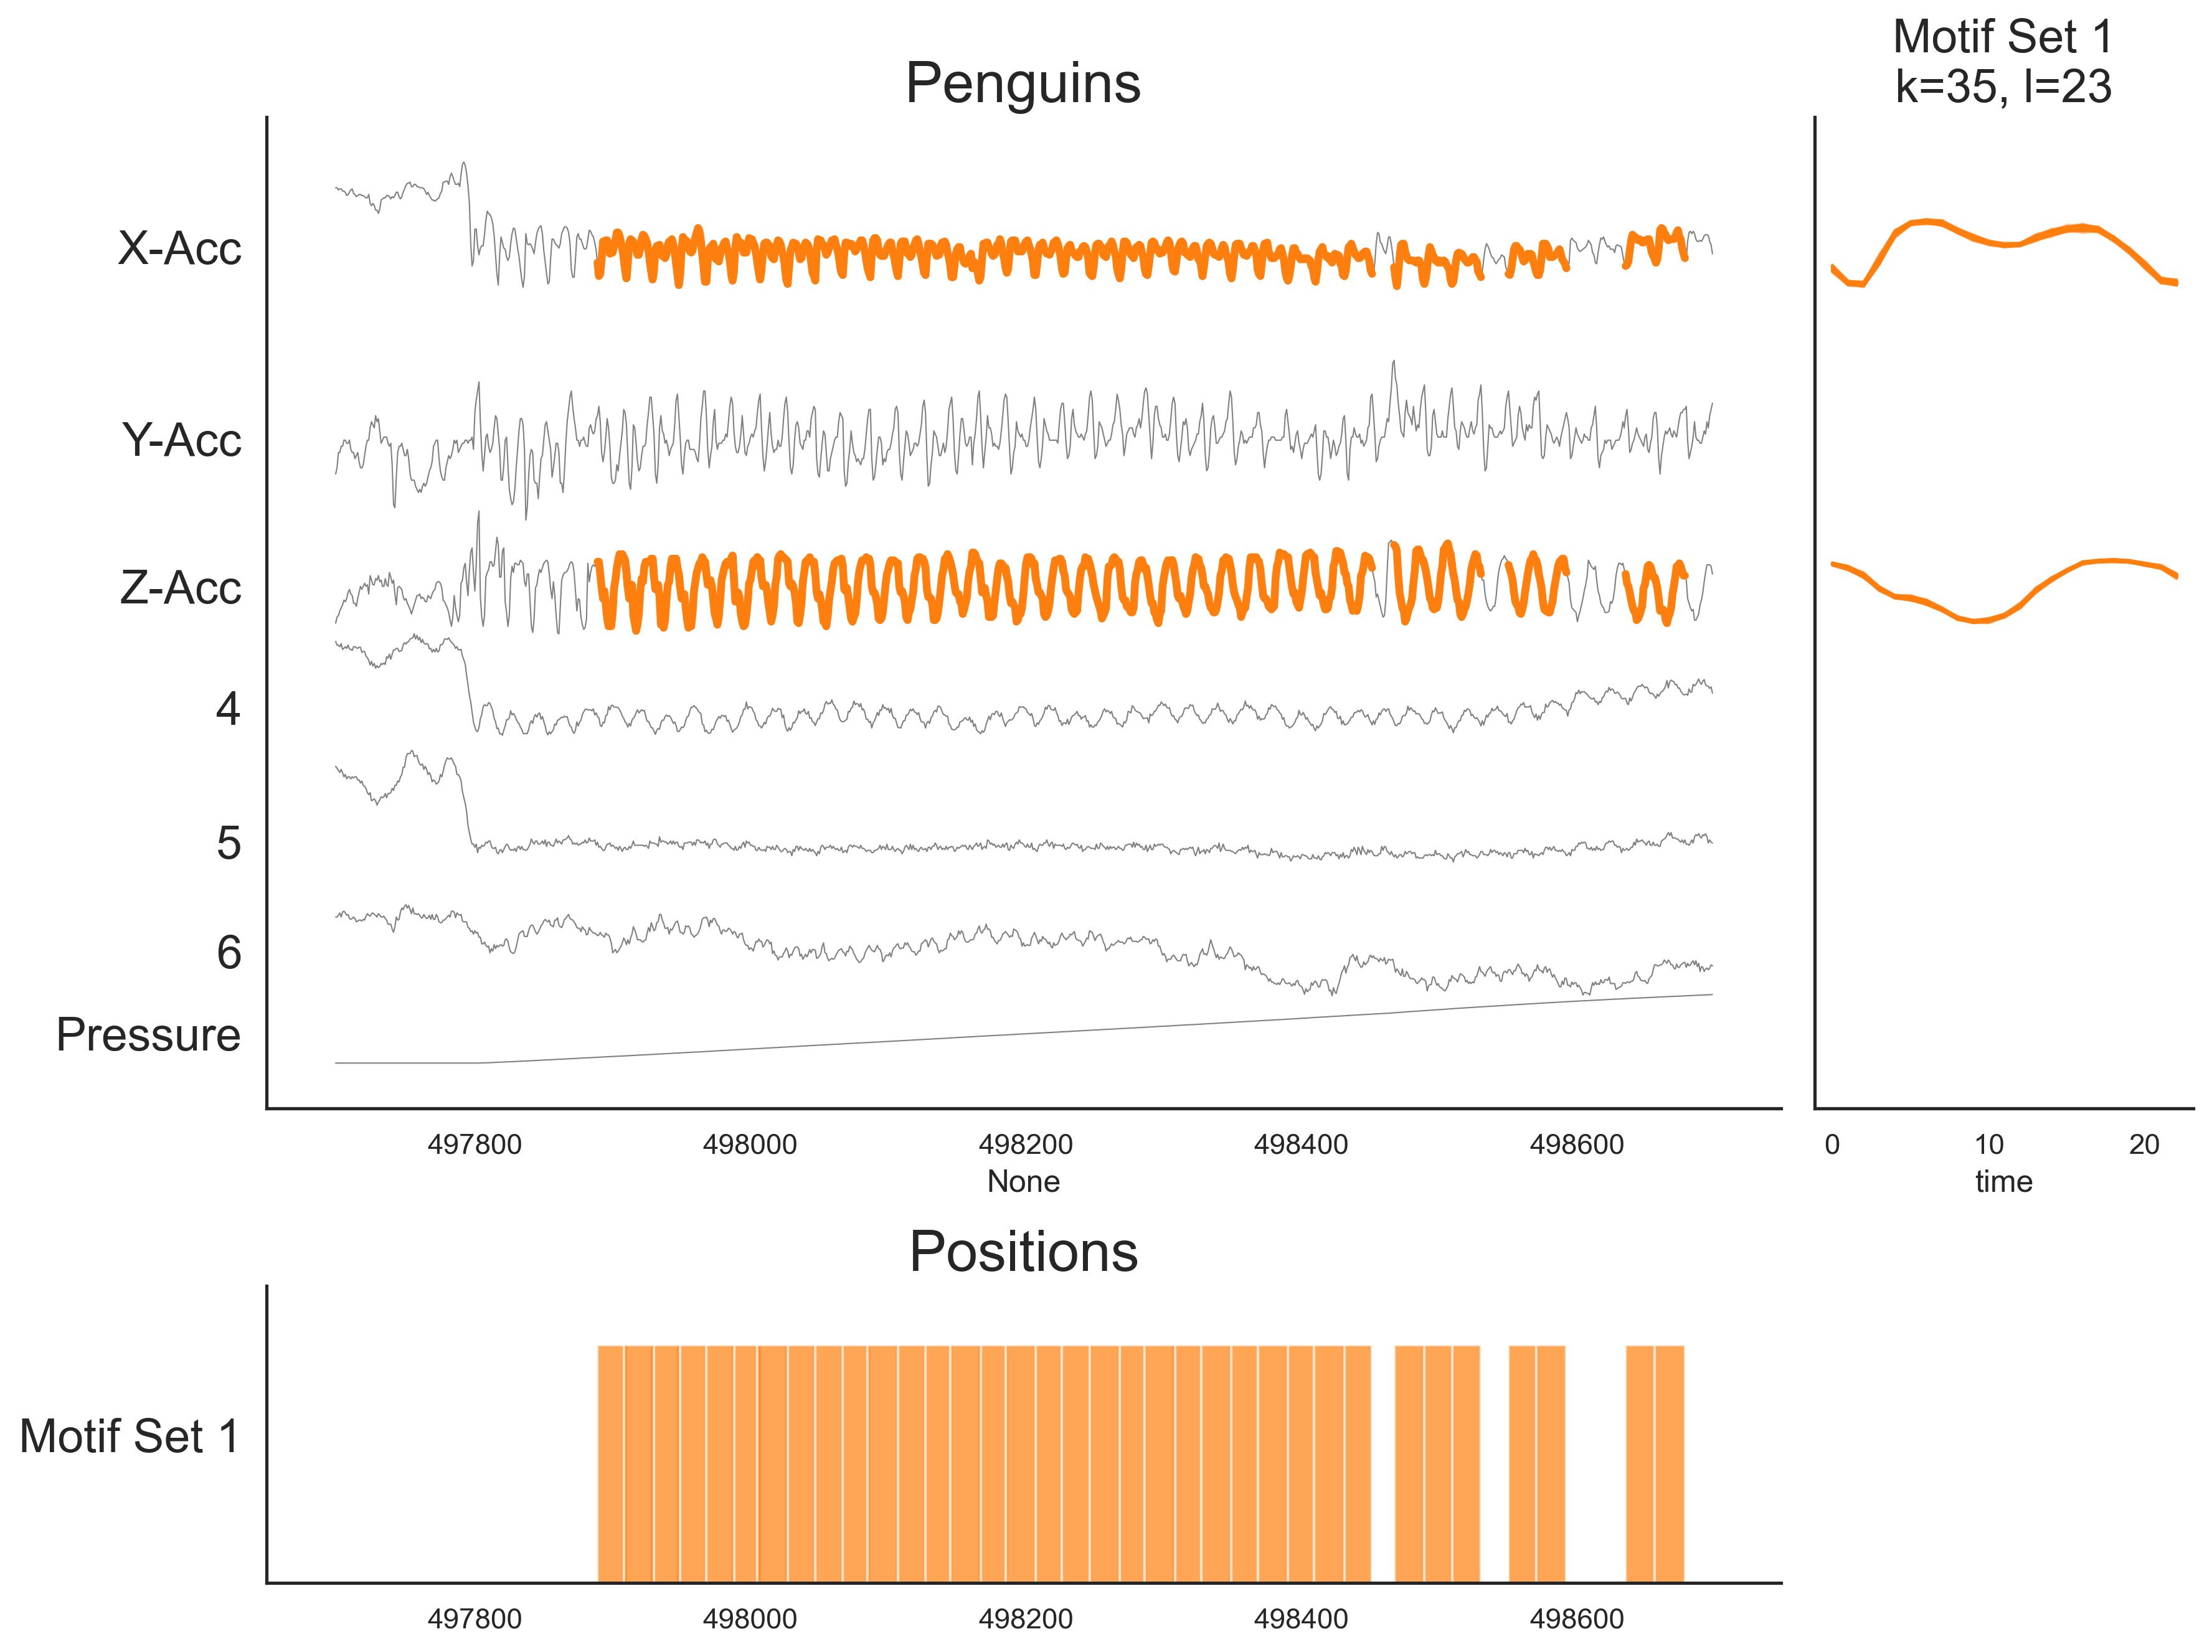

In [3]:
length = 1_000
start = 0
series = TS.iloc[497699 + start:497699 + start + length, [0, 1, 2, 3, 4, 5, 7]].T

# Input Parameters
f = 2          # number of sub-dimensions
k_max = 40     # expected number of repeats
motif_length_range = np.arange(20, 30, 1)   # leitmotif length range


# initialize LAMA
ml = LAMA(
    ds_name,  
    series,
    n_dims=f,   # number of sub-dimensions
    n_jobs=8    # number of parallel jobs
)

_ = ml.fit_motif_length(
    k_max,
    motif_length_range,
    plot=True,
    plot_elbows=True,
    plot_motifsets=True,
    plot_best_only=True
)    

# Hunting

Shortly into the dive, the penguin reached its hunting ground, indicated by decrease in pressure. A different Leitmotif emerges, equal to a stroke and a glide with $24$ repeats and shorter length $l=21$. 

Using Default Backend


Compute ks (40):   0%|          | 0/39 [00:00<?, ?it/s]

Using Default Backend


Compute ks (40):   0%|          | 0/39 [00:00<?, ?it/s]

Using Default Backend


Compute ks (40):   0%|          | 0/39 [00:00<?, ?it/s]

Using Default Backend


Compute ks (40):   0%|          | 0/39 [00:00<?, ?it/s]

Using Default Backend


Compute ks (40):   0%|          | 0/39 [00:00<?, ?it/s]

Using Default Backend


Compute ks (40):   0%|          | 0/39 [00:00<?, ?it/s]

Using Default Backend


Compute ks (40):   0%|          | 0/39 [00:00<?, ?it/s]

Using Default Backend


Compute ks (40):   0%|          | 0/39 [00:00<?, ?it/s]

Using Default Backend


Compute ks (40):   0%|          | 0/39 [00:00<?, ?it/s]

Using Default Backend


Compute ks (40):   0%|          | 0/39 [00:00<?, ?it/s]

	Time 3.0 s


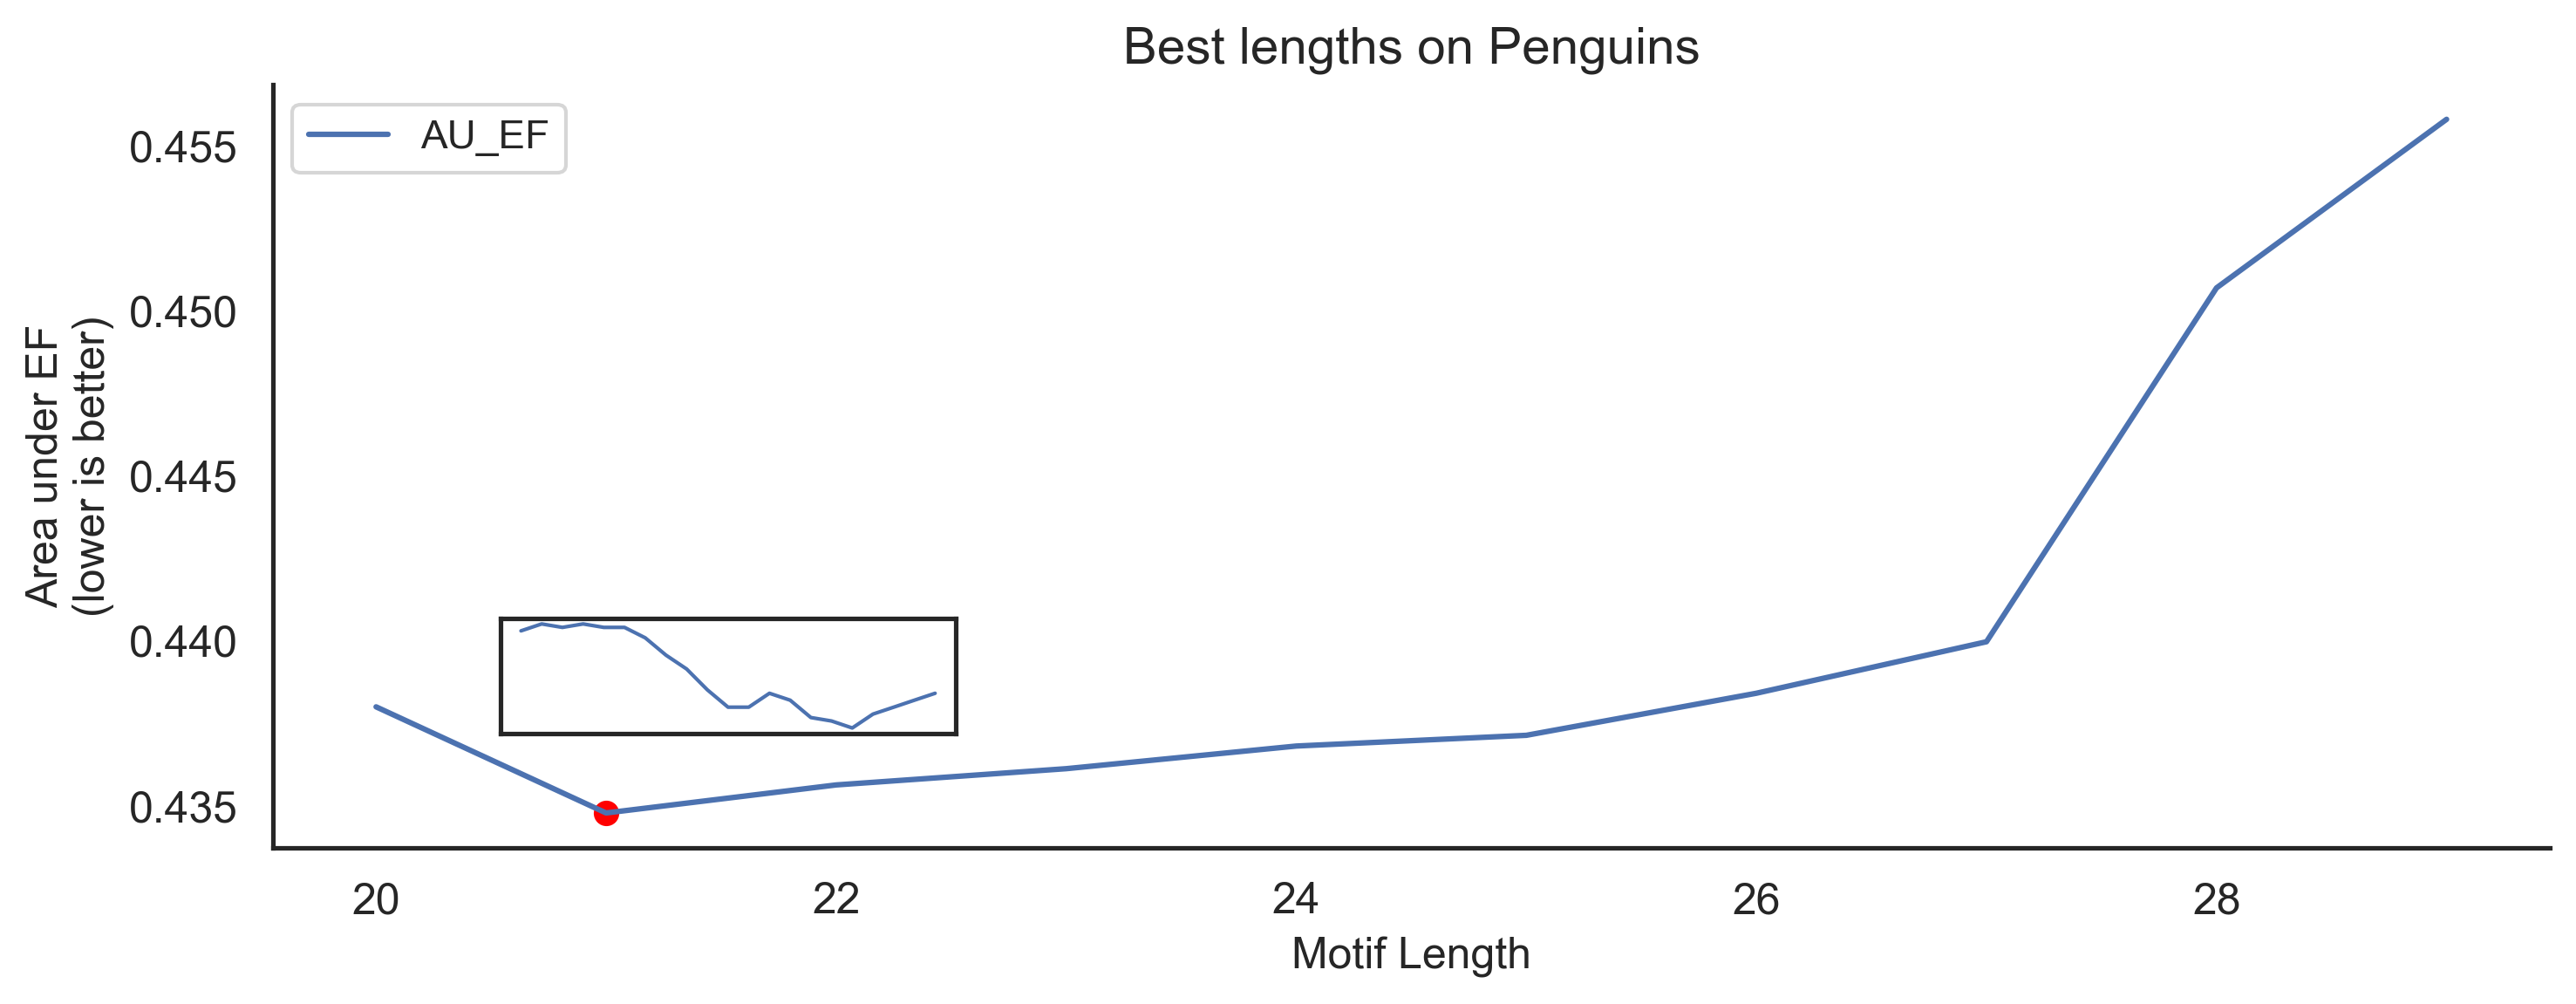

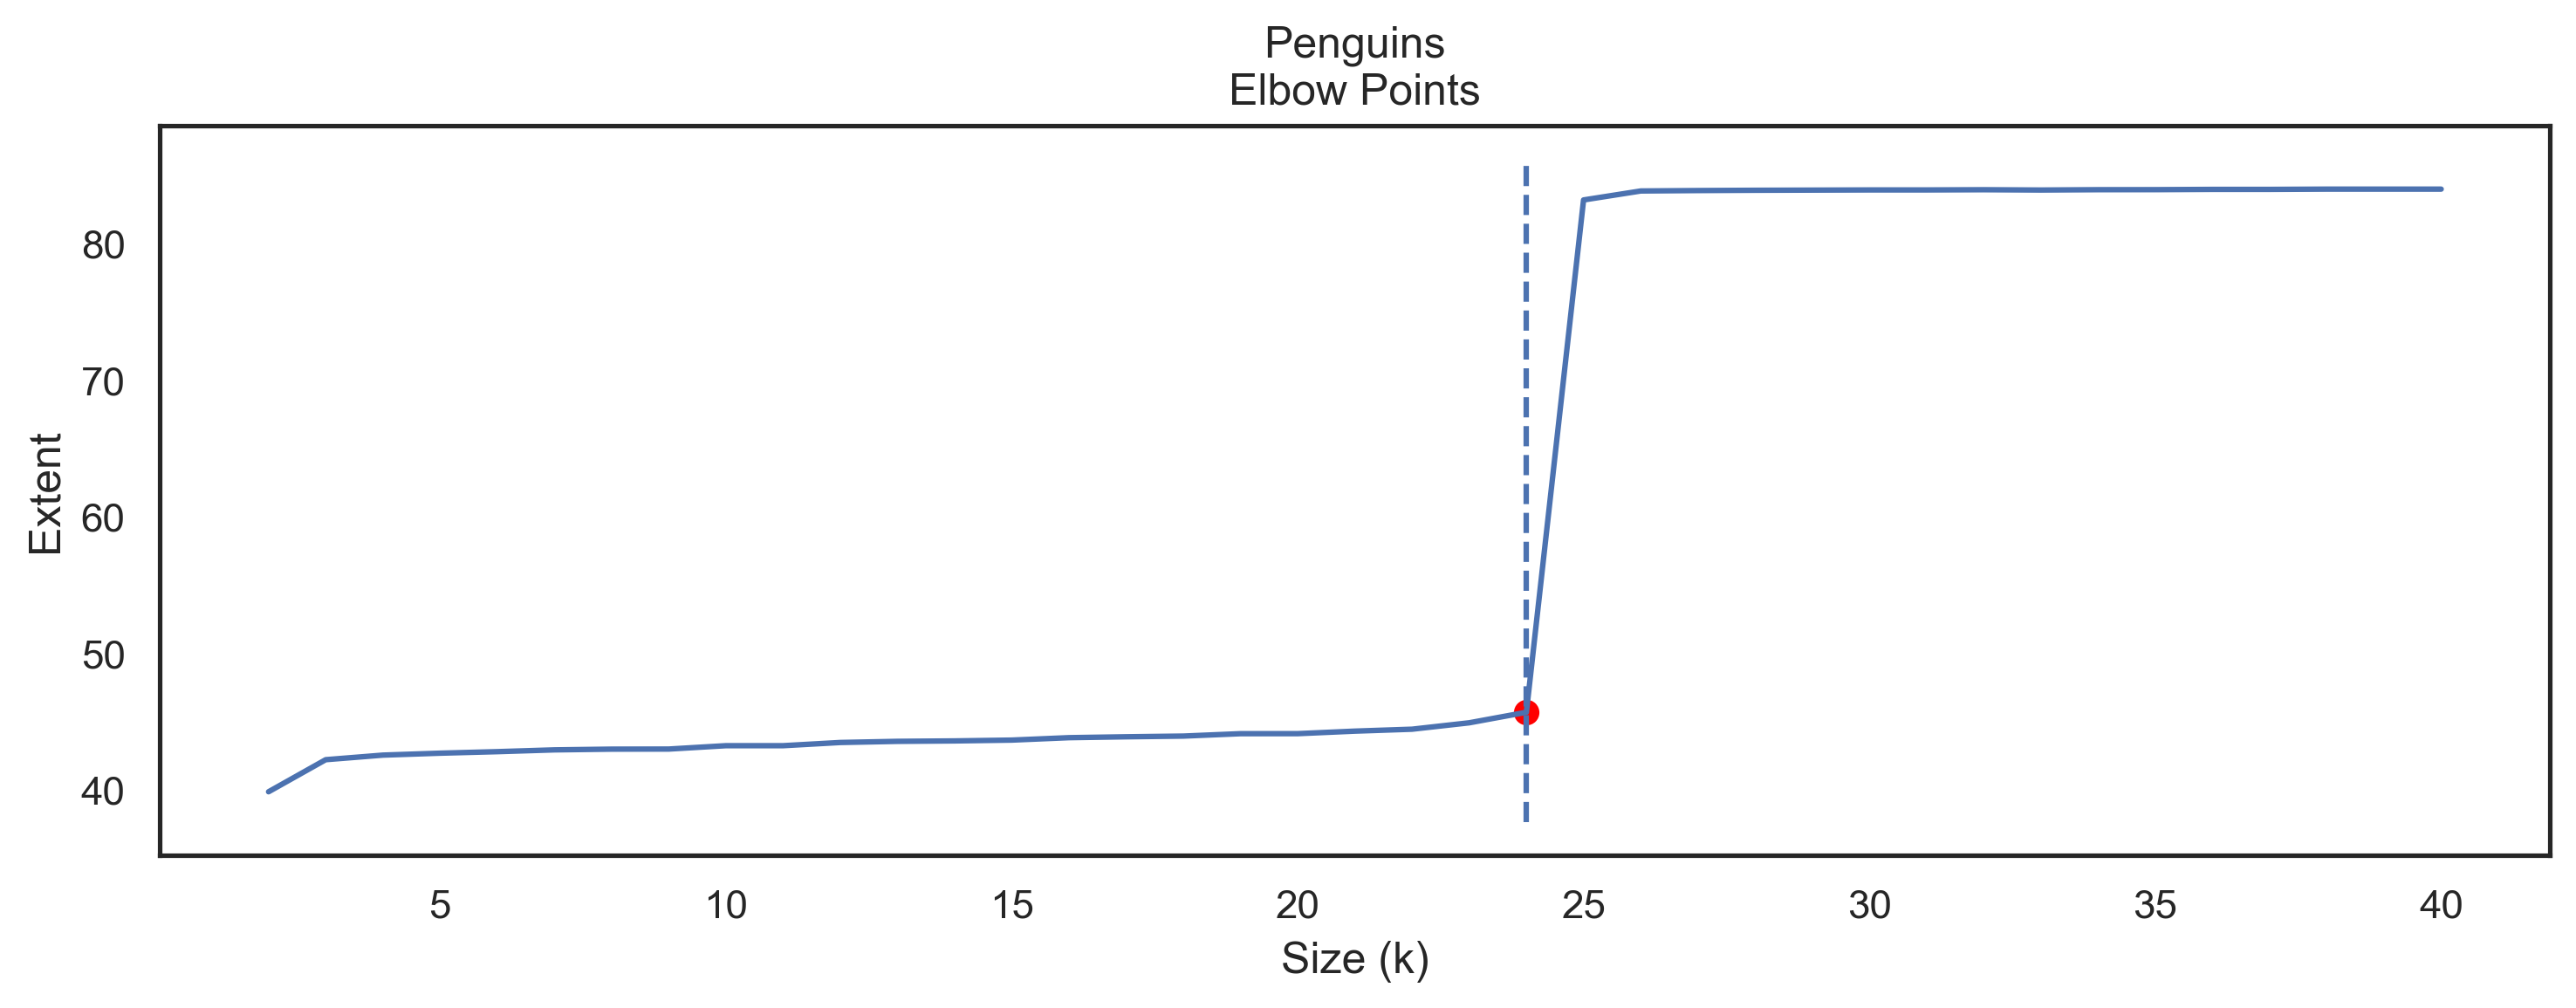

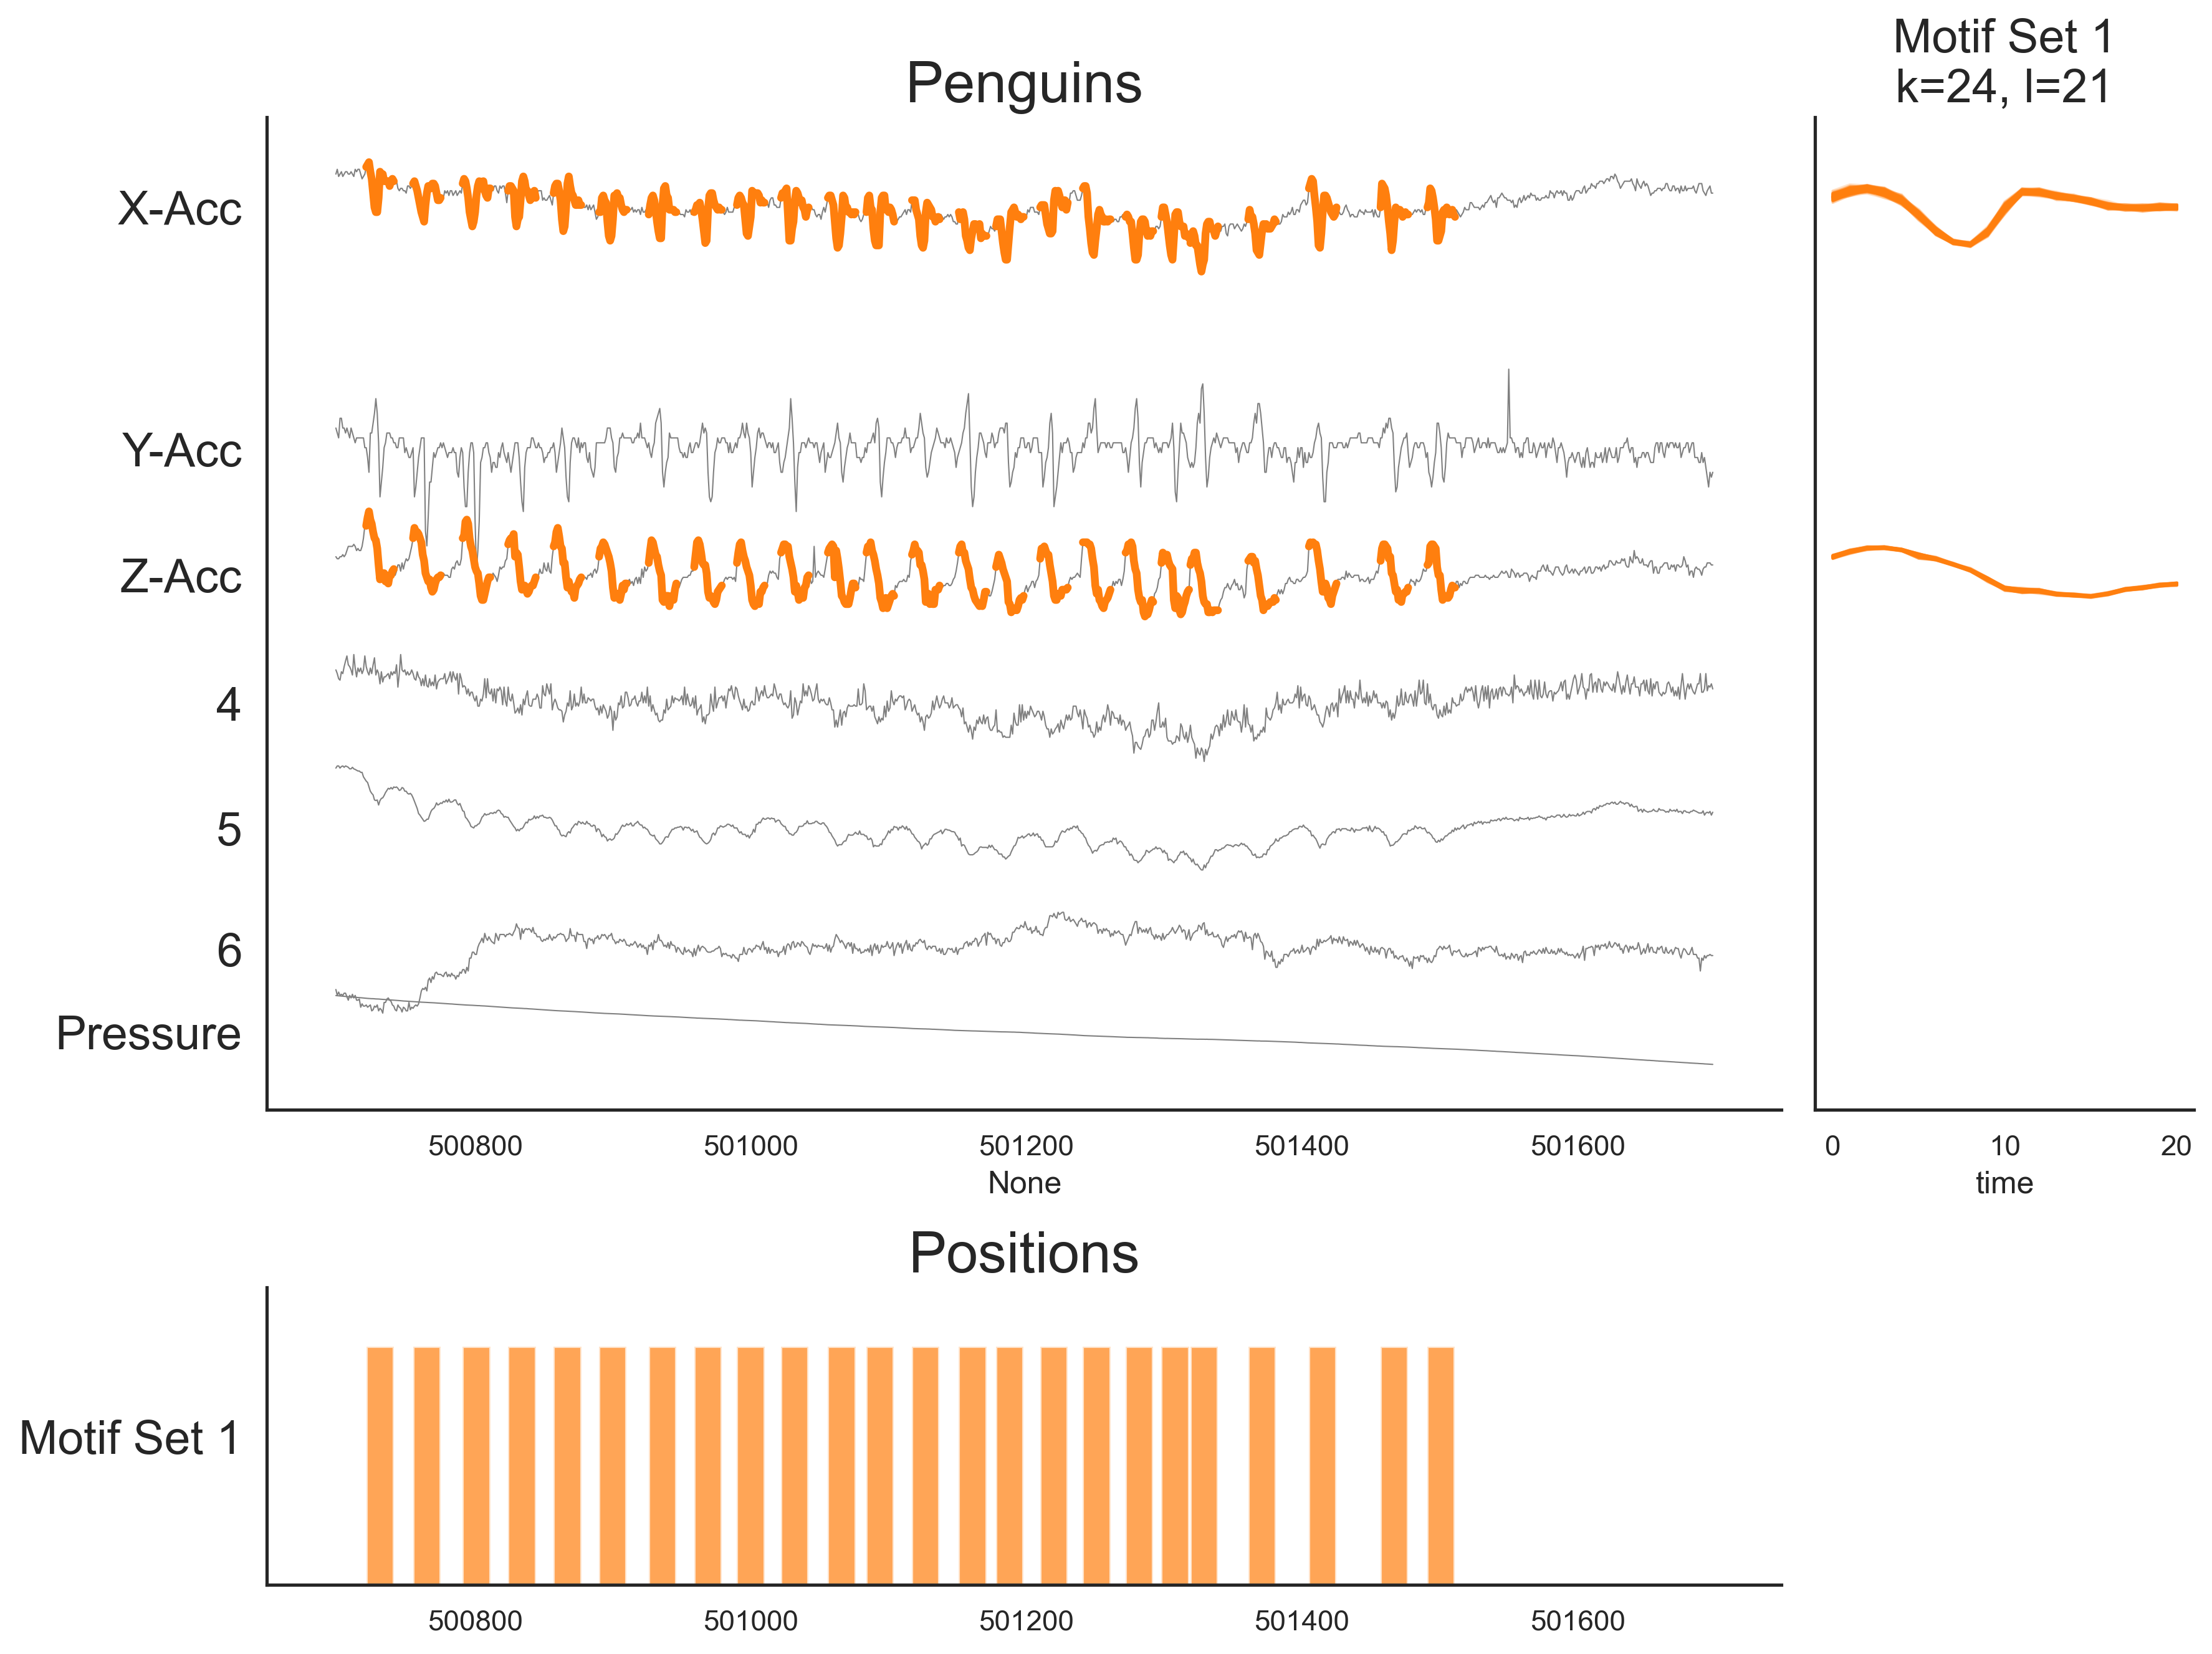

In [4]:
length = 1_000
start = 3000
series = TS.iloc[497699 + start:497699 + start + length, [0, 1, 2, 3, 4, 5, 7]].T

# Input Parameters
f = 2          # number of sub-dimensions
k_max = 40     # expected number of repeats
motif_length_range = np.arange(20, 30, 1)   # leitmotif length range


# initialize LAMA
ml = LAMA(
    ds_name,  
    series,
    n_dims=f,   
    n_jobs=8,    # number of parallel jobs
    elbow_deviation=1.25,    
)

_ = ml.fit_motif_length(
    k_max,
    motif_length_range,
    plot=True,
    plot_elbows=True,
    plot_motifsets=True,
    plot_best_only=True
)    